<a href="https://www.kaggle.com/code/nicksv03/age-gender-detection-system?scriptVersionId=132934436" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras import backend as K
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Data Check

In [2]:
path = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print('total samples :',size)

total samples : 23708


In [3]:
files[0]

'26_0_2_20170104023102422.jpg.chip.jpg'

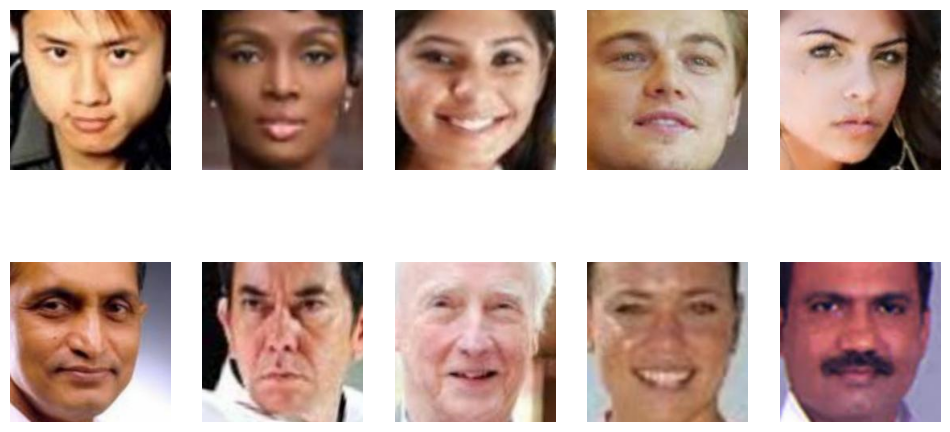

In [4]:
fig, ax = plt.subplots(2,5, figsize=(12, 6), sharex=True, sharey=True)
for image_idx in range(10):
    ax[image_idx//5, image_idx%5].imshow(Image.open(os.path.join(path,files[image_idx])))
    ax[image_idx//5, image_idx%5].axis('off')
plt.show()

In [5]:
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image, dsize = (64,64))
    image = image.reshape((image.shape[0], image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]))

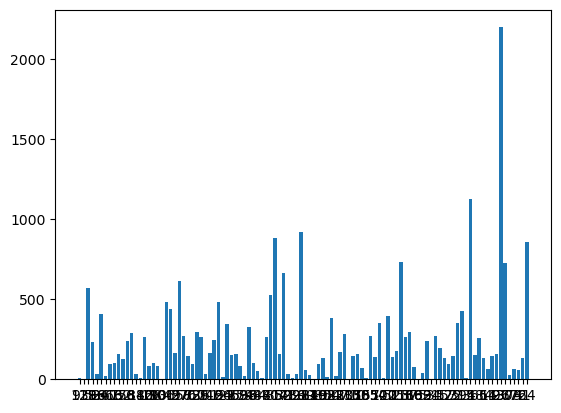

Max age: 99 Min age: 1


In [6]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages, y_ages)
plt.show()
print('Max age:', max(ages), 'Min age:', min(ages))

Gender: 0 Age: 54


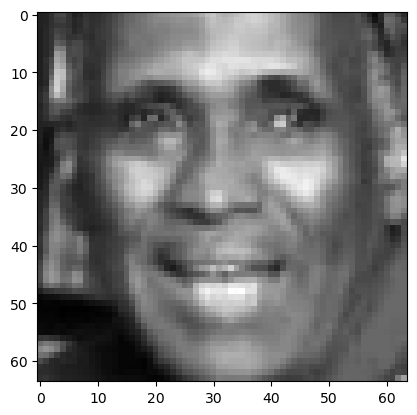

In [7]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print('Gender:', genders[idx],'Age:', ages[idx])
display(sample)

In [8]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

# Preprocessing

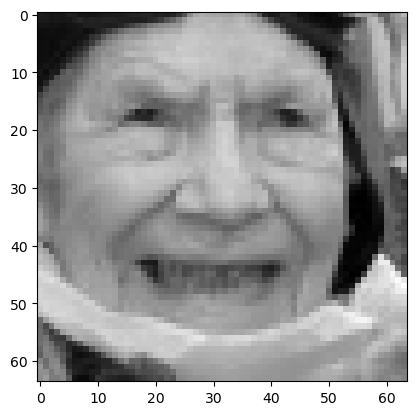

In [9]:
target = np.zeros((size, 2), dtype = 'float32')
features = np.zeros((size, sample.shape[0], sample.shape[1], 1), dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, shuffle = True)
print('Samples in Training:', x_train.shape[0])
print('Samples in Testing:', x_test.shape[0])

Samples in Training: 20151
Samples in Testing: 3557


In [11]:
# Shape of Image
print('Shape of Image:', sample.shape)

Shape of Image: (64, 64, 1)


### Tensorflow Backend